In [9]:
import numpy as np
import math 
import cmath 
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fsolve
import numpy.linalg as LA
from IPython.display import Image
np.set_printoptions(precision=4,suppress=True)

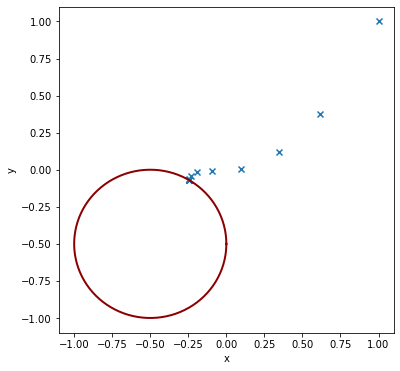

We get the same result as the book 


In [10]:
def g(args):
    alpha= args
    v=lambda x:100*(x[1]-x[0]**2)**2+ (1-x[0])**2+alpha/2*( (x[0]+0.5)**2+(x[1]+0.5)**2-0.25      )**2
    return v

x ,y ,alpha=1,1,0.1
record=np.array([[1,1]])

for i in range(20):
    
    x_opt = minimize(g(alpha ) , (x,y)) 
   
    alpha=alpha*6
    
    x,y=x_opt.x[0],x_opt.x[1]
    record=np.append(record,[x_opt.x],axis=0)
    

x=record[:,0]
y=record[:,1]

theta = np.linspace(0, 2 * np.pi, 200)
x_cir = -0.5+0.5* np.cos(theta)
y_cir = -0.5+0.5* np.sin(theta)

fig,ax=plt.subplots(figsize=(6, 6))
plt.scatter(x,y,marker="x")
ax.plot(x_cir, y_cir, color="darkred", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("We get the same result as the book ")

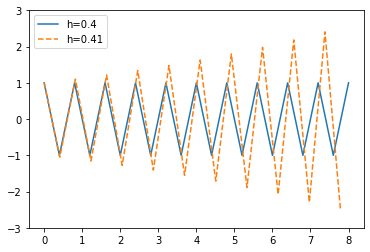

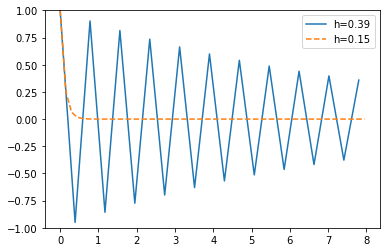

We can see that if h>0.4 it will oscillate andd diverge; if h<0.4 it will converge; if h=0.4, it will ocsillate with the same size
We get the same result as the book 


In [11]:
#Example 11.2
def Forward_Euler(func,x_0,h,T):
    record=[]
    record.append(x_0)
    x=x_0
    for i in range(int(T/h)):
        x=x+func(x,i*h)*h
        record.append(x)
    
    return record

def deri_y(y,t):
    return -5*y

record_1=Forward_Euler(deri_y,1,0.4,8)
x_1=np.arange(0,8.01,0.4)

record_2=Forward_Euler(deri_y,1,0.41,8)
x_2=np.arange(0,8.0,0.41)

fig,ax=plt.subplots()
plt.plot(x_1,record_1,ls="-",label="h=0.4")
plt.plot(x_2,record_2,ls="--",label="h=0.41")
ax.set_ylim(-3,3)
plt.legend()
plt.show()

record_3=Forward_Euler(deri_y,1,0.39,8)
x_3=np.arange(0,8.01,0.39)

record_4=Forward_Euler(deri_y,1,0.15,8)
x_4=np.arange(0,8.0,0.15)

fig,ax=plt.subplots()
plt.plot(x_3,record_3,ls="-",label="h=0.39")
plt.plot(x_4,record_4,ls="--",label="h=0.15")
ax.set_ylim(-1,1)
plt.legend()
plt.show()

print("We can see that if h>0.4 it will oscillate andd diverge; if h<0.4 it will converge; if h=0.4, it will ocsillate with the same size")
print("We get the same result as the book ")

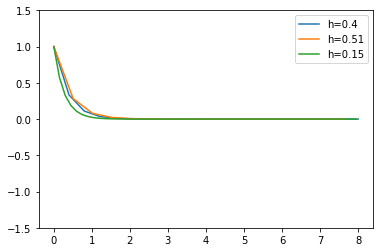

y'=-5y will converge to zero with any size


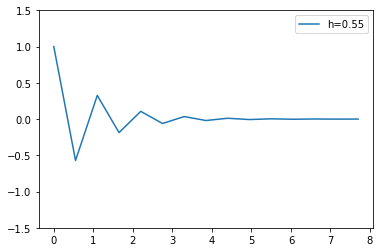

y'=5y will converge to zero if h>0.4, while the exact solution tends to infinity
We get the same result as the book 


In [12]:
def func(x,i,h,func_d):
    v=lambda y:  x+func_d(y,(i+1)*h)*h-y
    return v

def Backward_Euler(func_d,x_0,h,T):
    record=[]
    record.append(x_0)
    x=x_0
    for i in range(int(T/h)):
        v=func(x,i,h,func_d)
        x = fsolve(v,x)
        record.append(x)
    
    return record

def deri_y(y,t):
    return -5*y

record_1=np.array(Backward_Euler(deri_y,1,0.4,8))
record_2=np.array(Backward_Euler(deri_y,1,0.51,8))
record_3=np.array(Backward_Euler(deri_y,1,0.15,8))
x_1=np.arange(0,8.01,0.4)
x_2=np.arange(0,8.01,0.51)
x_3=np.arange(0,8.01,0.15)
fig,ax=plt.subplots()
plt.plot(x_1,record_1,ls="-",label="h=0.4")
plt.plot(x_2,record_2,ls="-",label="h=0.51")
plt.plot(x_3,record_3,ls="-",label="h=0.15")
ax.set_ylim(-1.5,1.5)
plt.legend()
plt.show()
print("y'=-5y will converge to zero with any size")

def deri_y_2(y,t):
    return 5*y

record_1=np.array(Backward_Euler(deri_y_2,1,0.55,8))
x_1=np.arange(0,8.0,0.55)
fig,ax=plt.subplots()
plt.plot(x_1,record_1,ls="-",label="h=0.55")
ax.set_ylim(-1.5,1.5)
plt.legend()
plt.show()

print("y'=5y will converge to zero if h>0.4, while the exact solution tends to infinity")
print("We get the same result as the book ")

Final Converge point is 
[0.     0.3333 0.    ]


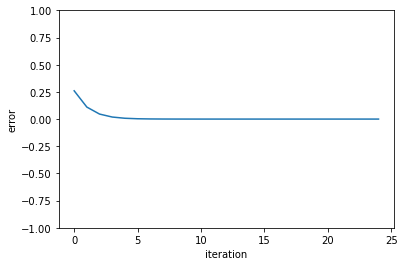

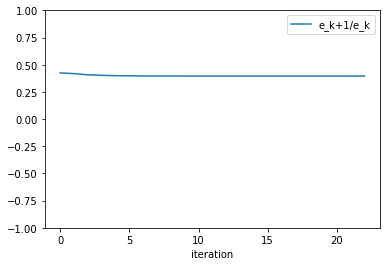

We can see that e_k+1/e_k is almost a line, thus fixed point method is order 1 (Linear)
We get the same result as the book 


In [13]:
## Chapter7  Q6
def phi(x):
    x1,x2,x3=x[0],x[1],x[2]
    f1=-1/81*math.cos(x1)+1/9*x2**2+1/3*math.sin(x1)
    f2=1/3*math.sin(x1)+1/3*math.cos(x3)
    f3=-1/9*math.cos(x1)+1/3*x2+1/6*math.sin(x3)
    F=np.array([f1,f2,f3])
    return F

tol=1e-10
error=10
sol=np.array([0,1/3,0])
x=np.array([0.5,0.5,0.5])
record=[]
while error>=tol:
    x=phi(x)
    error=LA.norm(x-sol)
    record.append(error)
record=np.array(record)
print("Final Converge point is ")
print(x)
fig,ax=plt.subplots()
plt.plot(record,ls="-")
ax.set_ylim(-1,1)
plt.xlabel("iteration")
plt.ylabel("error")
plt.show()

l=record.size
div=[]
for k in range(1,l-1):
    div.append(record[k]/record[k-1])
record=np.array(record)
fig,ax=plt.subplots()
plt.plot(div,ls="-",label="e_k+1/e_k")
ax.set_ylim(-1,1)
plt.xlabel("iteration")
plt.legend()
plt.show()
print("We can see that e_k+1/e_k is almost a line, thus fixed point method is order 1 (Linear)")
print("We get the same result as the book ")

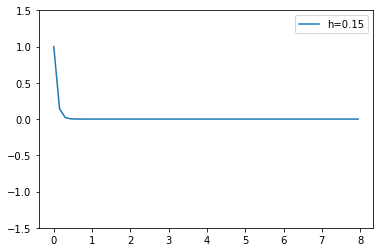

We get the same result as the book 


In [14]:
## Chapter 11 Q 9
def func_1(x,i,h,func_d):
    v=lambda y:  x+( func_d(y,(i+1)*h)+  func_d(x,i*h) )   *h/2-y
    return v

def Trapezoid(func_d,x_0,h,T):
    record=[]
    record.append(x_0)
    x=x_0
    for i in range(int(T/h)):
        v=func_1(x,i,h,func_d)
        x = fsolve(v,x)
        record.append(x)
    
    return record

def deri_y_3(y,t):
    return -10*y

record_1=np.array(Trapezoid(deri_y_3,1,0.15,8))
x_1=np.arange(0,8.0,0.15)
fig,ax=plt.subplots()
plt.plot(x_1,record_1,ls="-",label="h=0.15")
ax.set_ylim(-1.5,1.5)
plt.legend()
plt.show()
print("We get the same result as the book ")

Absolutely stable area


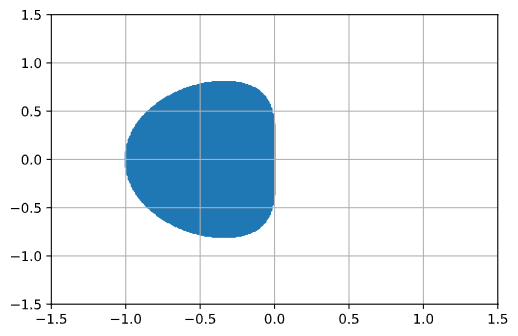

In [15]:
## Chpater11 Q10(2)
xall=np.linspace(-5,5,10)
yall=np.linspace(-5,5,10)
record=[]
for x in xall:
    for y in yall:
        z=x+y*1j
        x1=((3/2*z+1)+cmath.sqrt((3/2*z+1)**2-4*z/2))/2
        x2=((3/2*z+1)-cmath.sqrt((3/2*z+1)**2-4*z/2))/2
        x1=abs(x1)
        x2=abs(x2)
        if x1<1 and x2<1:
            record.append([x,y])
    
record=np.array(record)
print("Absolutely stable area")

# fig,ax=plt.subplots()
# plt.scatter(record[:,0],record[:,1],s=2)
# ax.set_ylim(-1.5,1.5)
# ax.set_xlim(-1.5,1.5)
# plt.grid()
# plt.show()
Image(filename="C:/Users/shark/Documents/GitHub/Numerical-2020-Fall-Homework/Homework6/1.png")



There is regions that do not connect


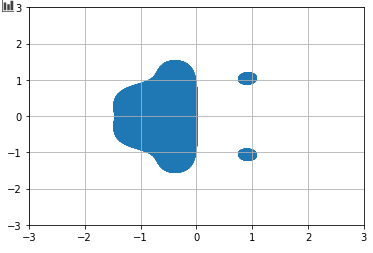

In [16]:
#Chapter11 Q14
def RK_5(x):
    return 1+x+pow(x,2)/2+pow(x,3)/3+pow(x,4)/4+pow(x,5)/5+pow(x,6)/6
def plot_AbS_area(func):
    xall=np.linspace(-2,2,1000)
    yall=np.linspace(-2,2,1000)
    record=[]
    for x in xall:
        for y in yall:
            z=x+y*1j
            x1=func(z)
            x1=abs(x1)
            if x1<1 :
                record.append([x,y])
    
    record=np.array(record)

    fig,ax=plt.subplots()
    plt.scatter(record[:,0],record[:,1],s=2)
    ax.set_ylim(-3,3)
    ax.set_xlim(-3,3)
    plt.grid()
    plt.show()

#Check for the function provided in book

# plot_AbS_area(RK_5)
print("There is regions that do not connect")
Image(filename="C:/Users/shark/Documents/GitHub/Numerical-2020-Fall-Homework/Homework6/2.png")
